# Actividad - Ecuaciones diferenciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [2]:
def f(t,x):
    return x/(t+1)

In [3]:
x0=np.array([2])

t_span=[0,10]
sol = solve_ivp(f,t_span,x0,max_step=0.01)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[ 2.  ,  2.02,  2.04, ..., 21.98, 22.  , 22.  ]])
 y_events: None

Grafique con condición inicial $x_0 = 2$

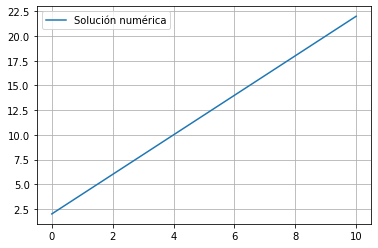

In [4]:
plt.figure()
plt.plot(sol.t,sol.y[0], label="Solución numérica")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [7]:
w0 = 3
X0=np.array([0.5,0.1])
t_span = [0, 10]
def g(t,X):
    x = X[0]
    dx = X[1]
    return np.array([dx, -w0**2*x])


In [11]:
SOL_2=solve_ivp(g, t_span, X0)
SOL_2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 200
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03155236,  0.22726141,  0.52816803,  0.8610037 ,
        1.18316806,  1.50098112,  1.83218442,  2.14635558,  2.47726245,
        2.80337308,  3.10697173,  3.43989074,  3.75818628,  4.08423442,
        4.41326092,  4.72273028,  5.05565472,  5.37848644,  5.69436332,
        6.02590825,  6.34081539,  6.6711194 ,  6.99774348,  7.30245607,
        7.63554257,  7.95468327,  8.27927832,  8.60884286,  8.9194039 ,
        9.25206165,  9.57569864,  9.88898102, 10.        ])
 t_events: None
        y: array([[ 0.5       ,  0.50091221,  0.40922482,  0.02637745, -0.40648722,
        -0.47203683, -0.13602161,  0.33004566,  0.49899612,  0.23436446,
        -0.23666475, -0.49400885, -0.33769145,  0.10718751,  0.46590177,
         0.41048455,  0.01577961, -0.41261929, -0.46790589, -0.12748737,
         0

Grafique

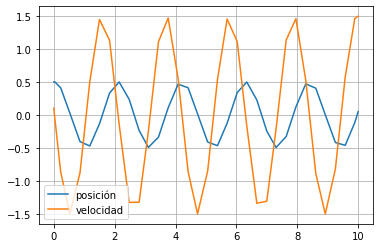

In [16]:
plt.figure()
plt.plot(SOL_2.t,SOL_2.y[0], label="posición")
plt.plot(SOL_2.t,SOL_2.y[1], label="velocidad")
plt.legend(loc="best")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [17]:
def posicion(t, w0):
    A = 0.5
    B = 0.1/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t):
    A = 0.5
    B = 0.1/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [19]:
t=np.linspace(0,10)
p=posicion(t,w0)
v=velocidad(t)

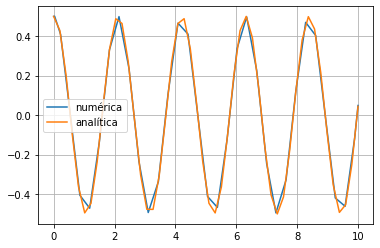

In [21]:
plt.figure()
plt.plot(SOL_2.t,SOL_2.y[0], label="numérica")
plt.plot(t,p, label="analítica")
plt.legend()
plt.title("")
plt.grid()